<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod3/dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod3/dt.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>




[Decision Tree](https://en.wikipedia.org/wiki/Decision_tree)
---
_homl3 ch6_

- Training and Visualizing a Decision Tree
  - Making Predictions
  - Estimating Class Probabilities
- The CART Training Algorithm
  - Computational Complexity
  - Gini Impurity or Entropy?
  - Regularization Hyperparameters
- Regression
- Limitations
  - Sensitivity to Axis Orientation
  - Decision Trees Have a High Variance

In [68]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds
from sklearn.tree import DecisionTreeClassifier

# Decision trees
- support classification, regression, and multioutput tasks
- the fundamental components of random forests
- implemented as class DecisionTreeClassifier in sklearn

# 🍎 Training and Visualizing a Decision Tree
- train a DecisionTreeClassifier on the iris dataset
- visualize the trained decision tree  using function export_graphviz() to output a graph definition file
- load and display the file using graphviz.Source.from_file()

In [69]:
# 1. train a DecisionTreeClassifier on the iris dataset
iris = skds.load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [70]:
# 2. use function export_graphviz() to output a graph definition file
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str("./img/iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

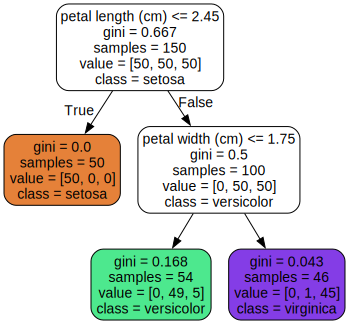

In [71]:
# 3. load and display the file using graphviz.Source.from_file()
# Note: install python-graphviz, graphviz and pydot first
from graphviz import Source

Source.from_file("./img/iris_tree.dot")

In [72]:
# dot command from Graphviz can convert .dot file to many image formats
!dot -Tpdf './img/iris_tree.dot' -o './img/iris_tree.pdf'

# Making Predictions
- The class of a sample can be decided along the decision tree
  - from the root to a leaf
  - each leaf corresponds to a class
- Each node in the decision tree contains
  - criteria of a feature
  - training samples satisfy this criteria
  - value, the array of the training samples belong to each class satisfy this criteria
  - Gini impurity
  - the positive class

The index `Gini impurity` measures a node's purity,

$$G_i = 1 - \sum_{k=1}^{K}p_{ik}^2$$
- in which,
  - $G_i$, the Gini impurity of the $i^{th}$ node
  - $p_{ik}$, the ratio of class k instances to the training instances in the $i^{th}$ node
    - $\displaystyle p_{ik} = \frac{value[i]}{sample_i}=\frac{value[i]}{value.sum()}$
    - $p_{ik}$ in a leaf node is the prediction probability of a sample being class k
  - $K$, the number of classes

- gini = 0, the node is pure, i.e. all training instances it applies to belong to the same class
  - such as setosa

📝 Practice
---
Calculate the Gini impurity of each node in the decision tree above.
- e.x. for the middle leaf node:

$$ 1 – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168$$

In [73]:
# Estimate Class Probabilities and make predictions on the last 5 samples
# the predicted class is the one with the highest probability

tree_clf.predict_proba(X_iris[-5:]).round(2), tree_clf.predict(X_iris[-5:])

(array([[0.  , 0.02, 0.98],
        [0.  , 0.02, 0.98],
        [0.  , 0.02, 0.98],
        [0.  , 0.02, 0.98],
        [0.  , 0.02, 0.98]]),
 array([2, 2, 2, 2, 2]))

## Decision boundaries

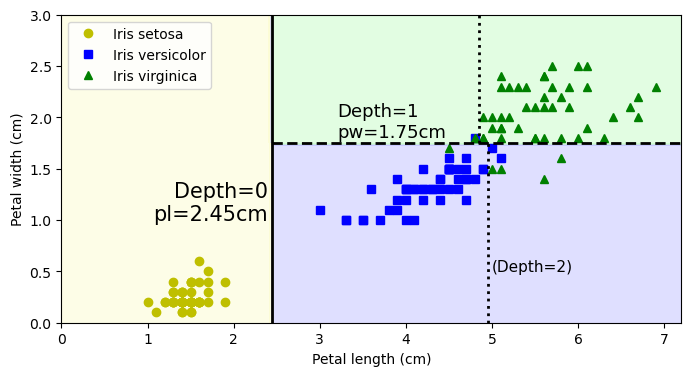

In [74]:
# the decision tree’s decision boundaries
# - the two vertical dotted lines show the decision boundaries if the depth = 3

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
fig1, axes1 = plt.subplots(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
axes1.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    axes1.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
axes1.set_xlabel("Petal length (cm)")
axes1.set_ylabel("Petal width (cm)")
axes1.plot([th0, th0], [0, 3], "k-", linewidth=2)
axes1.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
axes1.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
axes1.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
axes1.text(th0 - 0.05, 1.0, "Depth=0\npl=2.45cm", horizontalalignment="right", fontsize=15)
axes1.text(3.2, th1 + 0.02, "Depth=1\npw=1.75cm", verticalalignment="bottom", fontsize=13)
axes1.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
axes1.axis([0, 7.2, 0, 3])
axes1.legend();

In [75]:
# view the tree information
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

# The CART Training Algorithm
- CART, the abbreviation of the Classification and Regression Tree algorithm used by sklearn to train the decision tree recursively
- ❶ split the training set into two subsets using a single feature $x^{(i)}$ and a threshold $t_x^{(i)}$ at node $i$ starting from $n=0$, the root node.
     - the pair $(x^{(i)}, t_x^{(i)})$ produces the purest subsets, weighted by their size
- the CART cost function for classification

$$J(x^{(i)},t_x^{(i)})=\frac{n_{left}^{(i)}}{n^{(i)}}G_{left}^{(i)}+\frac{n_{right}^{(i)}}{n^{(i)}}G_{right}^{(i)}$$

- in which,
  - $G_{left/right}^{(i)}$, the impurity of the left/right subset
  - $n_{left/right}^{(i)}$, the number of samples in the left/right subset
  - $n^{(i)}$, the number of samples in node $i$
- ❷ the recursion stops at the maximum depth,
  - or the split cannot reduce impurity,
  - or other stop conditions happen: 
    - min_samples_split, min_samples_leaf, min_weight_fraction_leaf, 
    - and max_leaf_nodes
- the CART algorithm is a greedy algorithm
  - it produces a reasonably good solution but not guaranteed to be optimal
  - the decision trees produced are approximately balanced
    - so the overall prediction complexity is $O(\log_2(n))$
  - it compares all $m$ features (or less if max_features is set) on all $n$ samples at each node
    - so the training complexity is about $O(m × n\log_2(n))$
- finding the optimal tree is known to be an NP-complete problem
  - with time complexity of $O(\exp{(n)})$

# How to measure the impurity?
- the impurity can be measured with two indexes
  - the Gini impurity, default for the DecisionTreeClassifier class
  - the entropy impurity, can be chosen with `criterion="entropy"`
    -  a set’s entropy is zero when it contains instances of only one class
- the entropy of the $i^{th}$ node
    - $\displaystyle H_i = -\sum_{\substack{k=1\\ p_{ik}≠0}}^K p_{ik}\log_2 (p_{ik})$
    - $p_{ik}$, defined in the Gini impurity
- the two indexes lead to similar trees
  - Gini impurity is slightly faster so used by default
  - Gini impurity tends to isolate the most frequent class in its own branch of the tree
  - while entropy tends to produce slightly more balanced trees

📝 Practice
---
Calculate the entropy impurity of each node in the decision tree above.
- e.x. for the middle leaf node:  
 
$$–(49/54) \log_2 (49/54) – (5/54) \log_2 (5/54) ≈ 0.445$$

# Regularization Hyperparameters
- decision tree is a *nonparametric model*
  - its number of parameters is not determined prior to training 
  - so the model structure is free to stick closely to the data
    - with high risk of overfitting
      - can be reduced by restricting the maximum depth of the decision tree
- a *parametric model*, such as a linear model, has a predetermined number of parameters
  - its degree of freedom is limited,
    - reducing the risk of overfitting, but increasing the risk of underfitting
- The regularization hyperparameters used by decision trees
  - max_features
    - Maximum number of features that are evaluated for splitting at each node
  - max_leaf_nodes
    - Maximum number of leaf nodes
  - min_samples_split
    - Minimum number of samples a node must have before it can be split
  - min_samples_leaf
    - Minimum number of samples a leaf node must have to be created
  - min_weight_fraction_leaf
    - Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
- Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model

In [76]:
#  1. test regularization on the moons dataset
X_moons, y_moons = skds.make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [77]:
# training scores of the two decision trees
# tree_clf1 without regularization scores 100%,
# while tree_clf with regularization scores 94.66%

tree_clf1.score(X_moons, y_moons), tree_clf2.score(X_moons, y_moons)

(1.0, 0.9466666666666667)

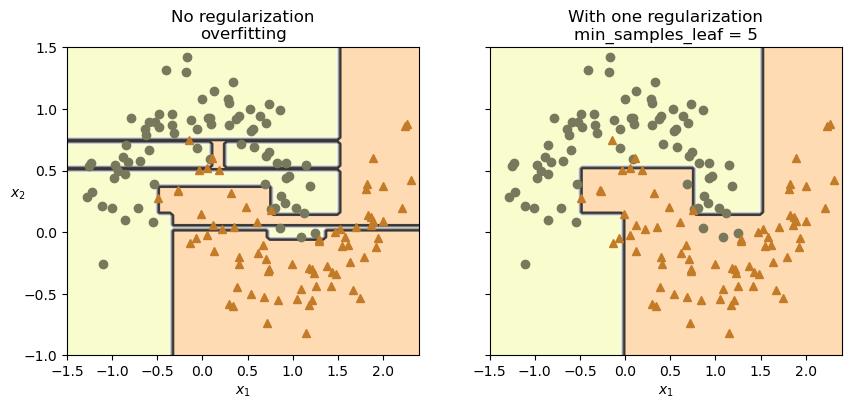

In [78]:
# 2. visualize regularization
# Decision boundaries of an unregularized tree (left) 
# and a regularized tree (right)

def plot_decision_boundary(ax, clf, X, y, axis, cmap):
    x1, x2 = np.meshgrid(np.linspace(axis[0], axis[1], 100),
                         np.linspace(axis[2], axis[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    ax.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        ax.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    ax.axis(axis)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$", rotation=0)

fig, axes2 = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plot_decision_boundary(axes2[0], tree_clf1, X_moons, y_moons,
                       axis=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
axes2[0].set_title("No regularization\noverfitting")

plot_decision_boundary(axes2[1], tree_clf2, X_moons, y_moons,
                       axis=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
axes2[1].set_title(f"With one regularization\nmin_samples_leaf = {tree_clf2.min_samples_leaf}")
axes2[1].set_ylabel("");

- The unregularized model is clearly overfitting
- regularized model will probably generalize better

In [79]:
# evaluate the two decision trees above with a new moons dataset
# compare with their training scores
# it's obvious that tree_clf1 is overfitting
 
X_moons_test, y_moons_test = skds.make_moons(n_samples=1000, noise=0.2, random_state=43)

tree_clf1.score(X_moons_test, y_moons_test), tree_clf2.score(X_moons_test, y_moons_test)

(0.898, 0.92)

Regression
---
- Decision trees are also capable of performing regression tasks
- supported by Scikit-Learn’s DecisionTreeRegressor class
- it predicts a value instead a class in each node
  - This prediction is the average target value of the samples in that node
    - with a mean squared error

In [80]:
# 1. training a decision tree regressor 
# on a noisy quadratic dataset with max_depth=2

from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

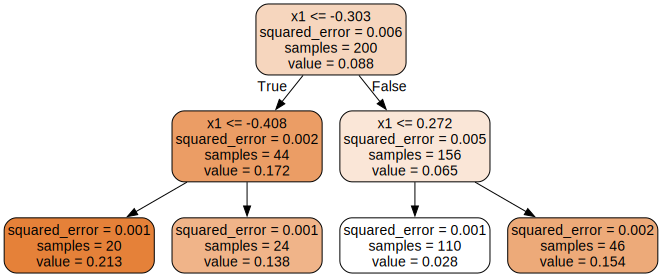

In [81]:
# 2. visualize the regression tree

export_graphviz(
    tree_reg,
    out_file=str("./img/regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("./img/regression_tree.dot")

In [82]:
# 3. train one more regressor tree with max_depth=3

tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

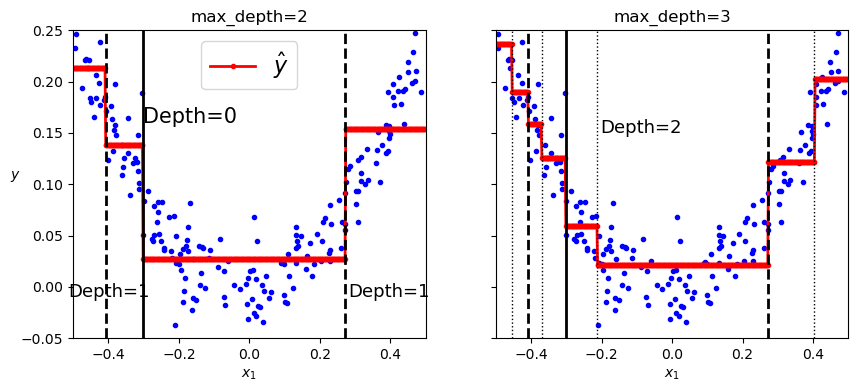

In [83]:
# visualize and compare the two regressor trees

def plot_regression_predictions(ax, tree_reg, X, y, axis=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axis[0], axis[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    ax.axis(axis)
    ax.set_xlabel("$x_1$")
    ax.plot(X, y, "b.")
    ax.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig3, axes3 = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plot_regression_predictions(axes3[0], tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    axes3[0].plot([split, split], [-0.05, 0.25], style, linewidth=2)
axes3[0].text(th0, 0.16, "Depth=0", fontsize=15)
axes3[0].text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
axes3[0].text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
axes3[0].set_ylabel("$y$", rotation=0)
axes3[0].legend(loc="upper center", fontsize=16)
axes3[0].set_title("max_depth=2")

th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(axes3[1], tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    axes3[1].plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    axes3[1].plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
axes3[1].text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
axes3[1].set_title("max_depth=3");

- The algorithm splits each region in a way 
  - that makes most training instances as close as possible to that predicted value
- the one vertical solid  represents `Depth=0`
- the two vertical dashed lines represent `Depth=1`
- the four vertical dotted lines represent `Depth=2`

- The CART algorithm split the training set in a way that minimizes 
  - the MSE in regression
  - the impurity in classification
- the CART cost function for regression in node $i$ with $n^{(i)}$ samples $Y^{(i)}$:

$$J(x^{(i)},t_x^{(i)})=\frac{\hat{y}_{left}^{(i)}}{n^{(i)}}MSE_{left}^{(i)}+\frac{\hat{y}_{right}^{(i)}}{n^{(i)}}MSE_{right}^{(i)}$$

- in which,
  - $\displaystyle \hat{y}^{(i)}=\frac{\sum_{j=1}^{|Y^{(i)}|}y_j^{(i)}}{n^{(i)}}$, the mean of the target values in node $i$
  - $\displaystyle MSE^{(i)}=\frac{\sum_{j=1}^{|Y^{(i)}|} (y_j^{(i)}-\hat{y}^{(i)})^2}{n^{(i)}}$, the MSE of the target values in node $i$

- decision trees are prone to overfitting without any regularization
  - no matter for classification or regression

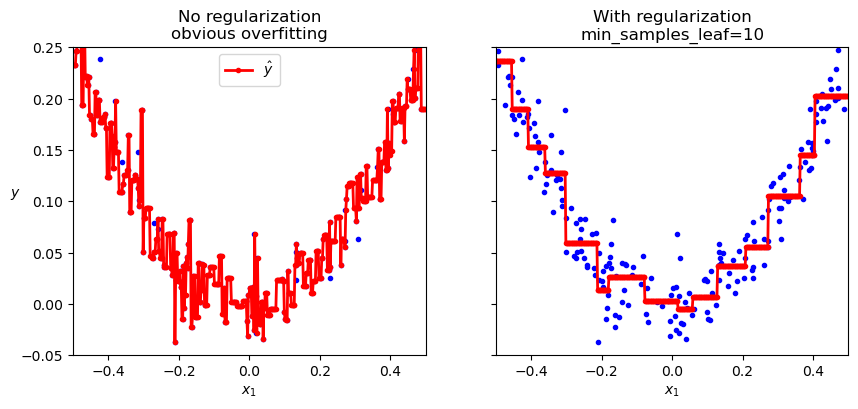

In [84]:
# DT regression without/with regularization

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig4, axes4 = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

axes4[0].plot(X_quad, y_quad, "b.")
axes4[0].plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
axes4[0].axis([-0.5, 0.5, -0.05, 0.25])
axes4[0].set_xlabel("$x_1$")
axes4[0].set_ylabel("$y$", rotation=0)
axes4[0].legend(loc="upper center")
axes4[0].set_title("No regularization\nobvious overfitting")

axes4[1].plot(X_quad, y_quad, "b.")
axes4[1].plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
axes4[1].axis([-0.5, 0.5, -0.05, 0.25])
axes4[1].set_xlabel("$x_1$")
axes4[1].set_title(f"With regularization\nmin_samples_leaf={tree_reg2.min_samples_leaf}");

Two big limitations of DTs
---
- ❶ sensitive to the data’s orientation
   - since DTs prefer orthogonal decision boundaries

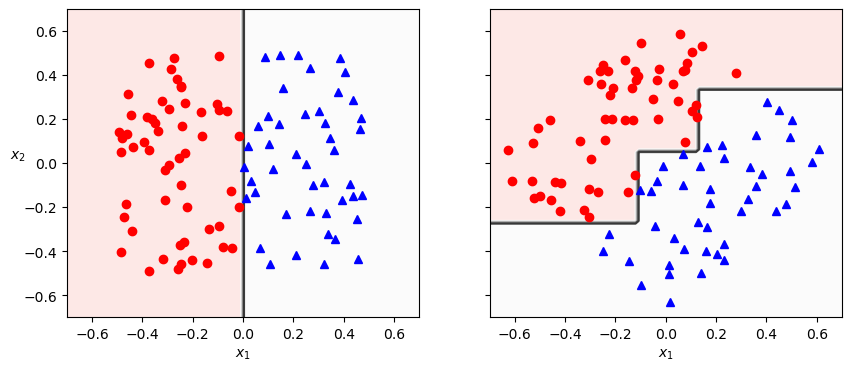

In [85]:
# Rotating the dataset also leads to completely different decision boundaries:

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # rotate 45 degrees clockwise
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig5, axes5 = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plot_decision_boundary(axes5[0], tree_clf_square, X_square, y_square,
                       axis=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plot_decision_boundary(axes5[1], tree_clf_rotated_square, X_rotated_square, y_square,
                       axis=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
axes5[1].set_ylabel("");

- how to mitigate the sensitivity?
  - scale the data
  - apply a principal component analysis (PCA) transformation
  - PCA rotates the data in a way that reduces the correlation between the features

In [86]:
# 1. scale --> PCA --> train
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

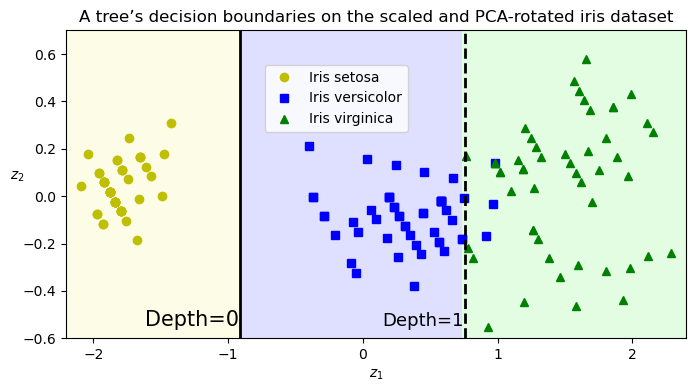

In [87]:
# 2. visualize

fig6, axes6 = plt.subplots(figsize=(8, 4))

axis = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axis[0], axis[1], 100),
                       np.linspace(axis[2], axis[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

axes6.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    axes6.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

axes6.set_xlabel("$z_1$")
axes6.set_ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
axes6.plot([th1, th1], axis[2:], "k-", linewidth=2)
axes6.plot([th2, th2], axis[2:], "k--", linewidth=2)
axes6.text(th1 - 0.01, axis[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
axes6.text(th2 - 0.01, axis[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
axes6.axis(axis)
axes6.set_title("A tree’s decision boundaries on the scaled and PCA-rotated iris dataset")
axes6.legend(loc=(0.32, 0.67));

- ❷ DTs have a quite high variance, i.e. sensitive to
  - small changes of the hyperparameters or the data
  - even retraining the DT on the same dataset without setting the `random_state` hyperparameter
    - because the CART algorithm randomly selects the set of features to evaluate at each node
- the variance can be reduced significantly by averaging predictions over many DTs
  - such an ensemble of trees is called a random forest (RF)
    -  RF is one of the most powerful types of models available today

In [88]:
# DTs are sensitive to retraining
# 1. Retrain a DT on the same dataset with
# a random_state different from before

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=911)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=911)

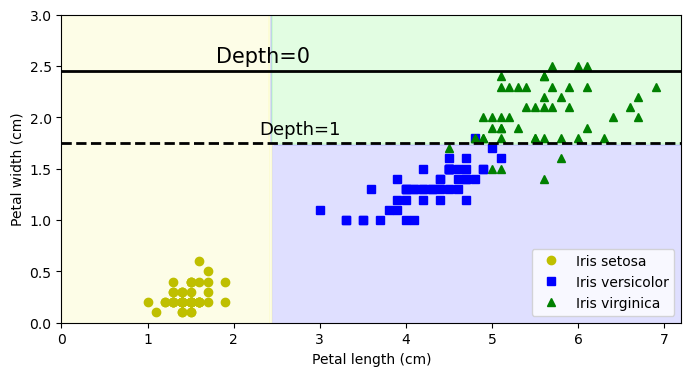

In [89]:
# 2. visualize this retrained DT

fig7, axes7 = plt.subplots(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
axes7.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    axes7.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
axes7.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
axes7.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
axes7.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
axes7.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
axes7.set_xlabel("Petal length (cm)")
axes7.set_ylabel("Petal width (cm)")
axes7.axis([0, 7.2, 0, 3])
axes7.legend();

# References
- [scikit Decision Trees](https://scikit-learn.org/stable/modules/tree.html)